# Logistic regression

## World happiness report


The World Happiness Report ranks 156 countries by their happiness levels (`Happiness.Score`). The rankings come from the Gallup World Poll and are based on answers to the main life evaluation question asked in the poll. This is called the Cantril ladder: it asks respondents to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. The rankings are from nationally representative samples, for the years 2013-2015. They are based entirely on the survey scores, using the Gallup weights to make the estimates representative. 

The other variables in the dataset show the estimated extent to which each of the factors contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the factors (for more information about the data, visit this [FAQ-site](https://s3.amazonaws.com/happiness-report/2016/FAQ_2016.pdf) or the [World Happiness Report-site](http://worldhappiness.report/ed/2016/)).

Data Source: 

*Helliwell, J., Layard, R., & Sachs, J. (2016). World Happiness Report 2016, Update (Vol. I).
New York: Sustainable Development Solutions Network.*


## Task Description

In this assignment, we analyse the relationship between the country specific happiness and some predictor variables. In particular, we want to classify which countries are likely to be "happy". 


Data preparation:

- 1.1 Rename the variables in the DataFrame to 'Country', 'Happiness_Score', 'Economy', 'Family', 'Health' and 'Trust'. Check for missing values.    

- 1.2 Create a new categorical variable called `Happy`, where all countries with a Happiness_Score > 5.5 are labeled with 'Yes', otherwise 'No'.  
    
- 1.3 Delete the variable `Happiness_Score` and change the data types if necessary (categorical, float, integer...). 

- 1.4 Visualize the distributions of the numerical variables and display the distributions of the two groups (Happy: 'Yes' and 'No').  

- 1.5. Check for relationships with correlations.

Logistic regression model:

- 2.a) Fit a logistic regression model with all predictor variables (response: `Happy`; predictors: `Economy`, `Family`, `Health` and `Trust`).  

- 2.b) Please explain wether you would recommend to exclude a predictor variable from your model (from task 2a)). Update your model if necessary.

- 2.c) Use your updated model and predict the probability that a country has "no happy" inhabitants. Classify this countries with label 'Yes' if the predicted probability exceeds:

    - c1): 0.4 (i.e. threshold = 0.4) 
    - c2): 0.5 (i.e. threshold = 0.5)
    - c3): 0.7 (i.e. threshold = 0.7). 
    
Otherwise classify the country as happy (with label 'No').


- 2.d) Compute the confusion matrix for every threshold (c1), c2) and c3)) in order to determine how many observations were correctly or incorrectly classified. Furthermore, use the results from the confusion matrix and create the following variables: true positive; true negative; false positive and false negative. Use these variables to calculate the following measures: "Accuracy", Precision" (what proportion of positive identifications was actually correct?), "Recall" (what proportion of actual positives was identified correctly) and the F1 score (measure of a test's accuracy) for the thresholds in c1), c2) and c3). Which threshold would you recommend? 

Hints: **Precision** is defined as the number of true positives over the number of true positives plus the number of false positives. **Recall** is defined as the number of true positives over the number of true positives plus the number of false negatives. These two quantities are related to the **F1 score**, which is defined as the harmonic mean of precision and recall: $F1 = 2* ((Precision * Recall)/(Precision + Recall)).$

- 2.e) Fit the logistic regression model using a training data set. Compute the confusion matrix and accuracy for the held out data (test data size = 30%). Use a threshold of 0.5.

## Python setup

In [30]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import chi2_contingency, fisher_exact

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
%matplotlib inline

## Data preparation

In [2]:
# Load the csv data files into pandas dataframes
PATH = 'https://raw.githubusercontent.com/kirenz/datasets/master/happy.csv' 
df = pd.read_csv(PATH)

## Tidying data

### Data inspection

First of all, let's take a look at the data set.

In [14]:
# show data set
df

,Country,Happiness_Score,Economy,Family,Health,Trust
0,Denmark,7.526,1.44178,1.16374,0.79504,0.44453
1,Switzerland,7.509,1.52733,1.14524,0.86303,0.41203
2,Iceland,7.501,1.42666,1.18326,0.86733,0.14975
3,Norway,7.498,1.57744,1.12690,0.79579,0.35776
4,Finland,7.413,1.40598,1.13464,0.81091,0.41004
...,...,...,...,...,...,...
152,Benin,3.484,0.39499,0.10419,0.21028,0.06681
153,Afghanistan,3.360,0.38227,0.11037,0.17344,0.07112
154,Togo,3.303,0.28123,0.00000,0.24811,0.11587
155,Syria,3.069,0.74719,0.14866,0.62994,0.17233


In [4]:
# Drop variables
df = df.drop('Unnamed: 0', axis=1)

In [15]:
df.describe()

,Happiness_Score,Economy,Family,Health,Trust
count,157.000000,157.000000,157.000000,157.000000,157.000000
mean,5.382185,0.953880,0.793621,0.557619,0.137624
std,1.141674,0.412595,0.266706,0.229349,0.111038
min,2.905000,0.000000,0.000000,0.000000,0.000000
25%,4.404000,0.670240,0.641840,0.382910,0.061260
50%,5.314000,1.027800,0.841420,0.596590,0.105470
75%,6.269000,1.279640,1.021520,0.729930,0.175540
max,7.526000,1.824270,1.183260,0.952770,0.505210


## 1.1 Rename and missing

In [5]:
df.columns = ['Country', 'Happiness_Score', 'Economy', 'Family', 'Health', 'Trust']
df.head()

,Country,Happiness_Score,Economy,Family,Health,Trust
0,Denmark,7.526,1.44178,1.16374,0.79504,0.44453
1,Switzerland,7.509,1.52733,1.14524,0.86303,0.41203
2,Iceland,7.501,1.42666,1.18326,0.86733,0.14975
3,Norway,7.498,1.57744,1.12690,0.79579,0.35776
4,Finland,7.413,1.40598,1.13464,0.81091,0.41004


Handle missing values

In [24]:
print(df.isnull().sum())

Country    0
Economy    0
Family     0
Health     0
Trust      0
Happy      0
dtype: int64


## 1.2 Create flag

In [17]:
df['Happy'] = np.where(df['Happiness_Score']>5.5, 'Yes', 'No')

In [19]:
df

,Country,Happiness_Score,Economy,Family,Health,Trust,Happy
0,Denmark,7.526,1.44178,1.16374,0.79504,0.44453,Yes
1,Switzerland,7.509,1.52733,1.14524,0.86303,0.41203,Yes
2,Iceland,7.501,1.42666,1.18326,0.86733,0.14975,Yes
3,Norway,7.498,1.57744,1.12690,0.79579,0.35776,Yes
4,Finland,7.413,1.40598,1.13464,0.81091,0.41004,Yes
...,...,...,...,...,...,...,...
152,Benin,3.484,0.39499,0.10419,0.21028,0.06681,No
153,Afghanistan,3.360,0.38227,0.11037,0.17344,0.07112,No
154,Togo,3.303,0.28123,0.00000,0.24811,0.11587,No
155,Syria,3.069,0.74719,0.14866,0.62994,0.17233,No


In [20]:
df.Happy.value_counts()

No     84
Yes    73
Name: Happy, dtype: int64

## 1.3 Drop and data format

In [21]:
df = df.drop('Happiness_Score', axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  157 non-null    object 
 1   Economy  157 non-null    float64
 2   Family   157 non-null    float64
 3   Health   157 non-null    float64
 4   Trust    157 non-null    float64
 5   Happy    157 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.5+ KB


In [23]:
# Change data types
df['Country'] = df['Country'].astype('category')
df['Happy'] = df['Happy'].astype('category')

## 1.4 Distribution

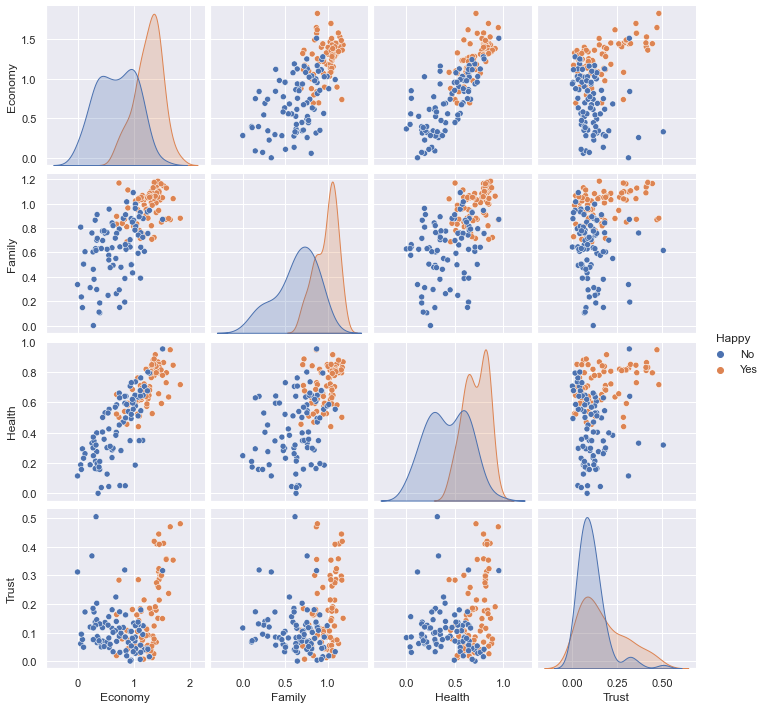

In [26]:
sns.pairplot(hue="Happy", data=df);

## 1.5 Correlation

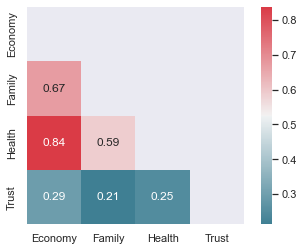

In [28]:
# Inspect relationship between variables (correlation)
# Calculate correlation using the default method ( "pearson")
corr = df.corr()
# optimize aesthetics: generate mask for removing duplicate / unnecessary info
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap as indicator for correlations:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Plot
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, square=True, annot_kws={"size": 12});

## 2a) Model with all predictors

In [37]:
model = smf.glm(formula = 'Happy ~ Economy + Family + Health + Trust' , data=df, family=sm.families.Binomial()).fit()

In [38]:
print(model.summary())

                      Generalized Linear Model Regression Results                      
Dep. Variable:     ['Happy[No]', 'Happy[Yes]']   No. Observations:                  157
Model:                                     GLM   Df Residuals:                      152
Model Family:                         Binomial   Df Model:                            4
Link Function:                           logit   Scale:                          1.0000
Method:                                   IRLS   Log-Likelihood:                -44.611
Date:                         Thu, 25 Nov 2021   Deviance:                       89.223
Time:                                 18:16:01   Pearson chi2:                     126.
No. Iterations:                              7                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

Note that Statsmodels decoded the dependent variable as Happy "No" and Happy "Yes". Since "No" comes first, the model will predict the label "No".

## 2. b) Update Model

In [39]:
# Define and fit logistic regression model
model_2 = smf.glm(formula = 'Happy ~ Economy + Family' , data=df, family=sm.families.Binomial()).fit()

In [40]:
print(model_2.summary())

                      Generalized Linear Model Regression Results                      
Dep. Variable:     ['Happy[No]', 'Happy[Yes]']   No. Observations:                  157
Model:                                     GLM   Df Residuals:                      154
Model Family:                         Binomial   Df Model:                            2
Link Function:                           logit   Scale:                          1.0000
Method:                                   IRLS   Log-Likelihood:                -46.804
Date:                         Thu, 25 Nov 2021   Deviance:                       93.608
Time:                                 18:16:17   Pearson chi2:                     93.5
No. Iterations:                              7                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

## 2c) Predict

In [45]:
# Predict and join probabilty to original dataframe
df['Probability_no'] = model_2.predict()

In [46]:
df

,Country,Economy,Family,Health,Trust,Happy,Probability,Probability_No,Probability_no
0,Denmark,1.44178,1.16374,0.79504,0.44453,Yes,0.013352,0.013352,0.013352
1,Switzerland,1.52733,1.14524,0.86303,0.41203,Yes,0.010696,0.010696,0.010696
2,Iceland,1.42666,1.18326,0.86733,0.14975,Yes,0.012194,0.012194,0.012194
3,Norway,1.57744,1.12690,0.79579,0.35776,Yes,0.009973,0.009973,0.009973
4,Finland,1.40598,1.13464,0.81091,0.41004,Yes,0.019640,0.019640,0.019640
...,...,...,...,...,...,...,...,...,...
152,Benin,0.39499,0.10419,0.21028,0.06681,No,0.999858,0.999858,0.999858
153,Afghanistan,0.38227,0.11037,0.17344,0.07112,No,0.999858,0.999858,0.999858
154,Togo,0.28123,0.00000,0.24811,0.11587,No,0.999963,0.999963,0.999963
155,Syria,0.74719,0.14866,0.62994,0.17233,No,0.999048,0.999048,0.999048


In [47]:
# Use thresholds to discretize Probability
df['Threshold 0.4'] = np.where(df['Probability_no'] > 0.4, 'No', 'Yes')
df['Threshold 0.5'] = np.where(df['Probability_no'] > 0.5, 'No', 'Yes')
df['Threshold 0.6'] = np.where(df['Probability_no'] > 0.6, 'No', 'Yes')
df['Threshold 0.7'] = np.where(df['Probability_no'] > 0.7, 'No', 'Yes')

df

,Country,Economy,Family,Health,Trust,Happy,Probability,Probability_No,Probability_no,Threshold 0.4,Threshold 0.5,Threshold 0.6,Threshold 0.7
0,Denmark,1.44178,1.16374,0.79504,0.44453,Yes,0.013352,0.013352,0.013352,Yes,Yes,Yes,Yes
1,Switzerland,1.52733,1.14524,0.86303,0.41203,Yes,0.010696,0.010696,0.010696,Yes,Yes,Yes,Yes
2,Iceland,1.42666,1.18326,0.86733,0.14975,Yes,0.012194,0.012194,0.012194,Yes,Yes,Yes,Yes
3,Norway,1.57744,1.12690,0.79579,0.35776,Yes,0.009973,0.009973,0.009973,Yes,Yes,Yes,Yes
4,Finland,1.40598,1.13464,0.81091,0.41004,Yes,0.019640,0.019640,0.019640,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,0.39499,0.10419,0.21028,0.06681,No,0.999858,0.999858,0.999858,No,No,No,No
153,Afghanistan,0.38227,0.11037,0.17344,0.07112,No,0.999858,0.999858,0.999858,No,No,No,No
154,Togo,0.28123,0.00000,0.24811,0.11587,No,0.999963,0.999963,0.999963,No,No,No,No
155,Syria,0.74719,0.14866,0.62994,0.17233,No,0.999048,0.999048,0.999048,No,No,No,No


## 2. d) Confusion Matrix & Metrics

In [48]:
def print_metrics(df, predicted):
    # Header
    print('-'*50)
    print(f'Metrics for: {predicted}\n')
    
    # Confusion Matrix
    y_actu = pd.Series(df['Happy'], name='Actual')
    y_pred = pd.Series(df[predicted], name='Predicted')
    df_conf = pd.crosstab(y_actu, y_pred)
    display(df_conf)
    
    # Confusion Matrix to variables:
    pop = df_conf.values.sum()
    tp = df_conf['Yes']['Yes']
    tn = df_conf['No']['No']
    fp = df_conf['Yes']['No']
    fn = df_conf['No']['Yes']
    
    # Metrics
    accuracy = (tp + tn) / pop
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * ((precision * recall) / (precision + recall))
    print(f'Accuracy:  {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall:    {recall:.4f}')
    print(f'F1 Score:  {f1_score:.4f} \n')

In [49]:
print_metrics(df, 'Threshold 0.4')
print_metrics(df, 'Threshold 0.5')
print_metrics(df, 'Threshold 0.6')
print_metrics(df, 'Threshold 0.7')

--------------------------------------------------
Metrics for: Threshold 0.4



Predicted,No,Yes
Actual,,
No,74,10
Yes,16,57


Accuracy:  0.8344
Precision: 0.8507
Recall:    0.7808
F1 Score:  0.8143 

--------------------------------------------------
Metrics for: Threshold 0.5



Predicted,No,Yes
Actual,,
No,73,11
Yes,13,60


Accuracy:  0.8471
Precision: 0.8451
Recall:    0.8219
F1 Score:  0.8333 

--------------------------------------------------
Metrics for: Threshold 0.6



Predicted,No,Yes
Actual,,
No,67,17
Yes,9,64


Accuracy:  0.8344
Precision: 0.7901
Recall:    0.8767
F1 Score:  0.8312 

--------------------------------------------------
Metrics for: Threshold 0.7



Predicted,No,Yes
Actual,,
No,62,22
Yes,5,68


Accuracy:  0.8280
Precision: 0.7556
Recall:    0.9315
F1 Score:  0.8344 



  General examples to explain the concepts:
  
  - When we have a case where it is important to predict true positives correctly and ther is a cost associated with false positives, then we should use precision. 
  
  - The metric recall would be a good metric if we want to target as many true positive cases as possible and don't care a lot about false positives. 

  - If we want a balance between recall and precision, we should use the F-Score.

## 2. e) Use train test data 

If we use train and test data, we need to change some of the steps above since we make use of a scikit learn library.

In [81]:
# Encode happy = 0 and not happy = 1. Convert to float

y = pd.get_dummies(df['Happy'])
y = y['No'].astype('float')

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
152    1.0
153    1.0
154    1.0
155    1.0
156    1.0
Name: No, Length: 157, dtype: float64

In [96]:
# Select features
X = df[['Economy', 'Family']]

In [109]:
# Train test split
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=12)

In [110]:
print("Training size:", len(train_X))
print("Test size:", len(test_X))

Training size: 109
Test size: 48


In [111]:
# Train logistic regression model with training set
logit = sm.Logit(train_y, train_X).fit()

Optimization terminated successfully.
         Current function value: 0.668028
         Iterations 4


In [112]:
print(logit.summary())

                           Logit Regression Results                           
Dep. Variable:                     No   No. Observations:                  109
Model:                          Logit   Df Residuals:                      107
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Nov 2021   Pseudo R-squ.:                 0.02285
Time:                        19:37:39   Log-Likelihood:                -72.815
converged:                       True   LL-Null:                       -74.518
Covariance Type:            nonrobust   LLR p-value:                   0.06499
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Economy       -1.2641      0.613     -2.062      0.039      -2.466      -0.062
Family         1.2158      0.739      1.644      0.100      -0.234       2.665


In [113]:
# create empty dataframe
data = pd.DataFrame()

# include prediction from test data
data['Probability'] = logit.predict(test_X)

In [114]:
# Calculate metrics
data['Happy'] = np.where(test_y == 1.0, 'No', 'Yes')  
data['Threshold 0.5'] = np.where(data['Probability'] > 0.5, 'No', 'Yes')  
data.head(7)

,Probability,Happy,Threshold 0.5
147,0.551640,No,No
87,0.386656,No,Yes
88,0.477599,No,Yes
152,0.407905,No,Yes
40,0.273433,Yes,Yes
61,0.340084,Yes,Yes
80,0.378483,No,Yes


In [115]:
print_metrics(data, 'Threshold 0.5')

--------------------------------------------------
Metrics for: Threshold 0.5



Predicted,No,Yes
Actual,,
No,9,13
Yes,1,25


Accuracy:  0.7083
Precision: 0.6579
Recall:    0.9615
F1 Score:  0.7812 

